In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
car_df=pd.read_csv("car_price_dataset.csv")
car_df.head()

,Car_Age,Car_Price
0,7.49,11190.52
1,19.01,3411.65
2,14.64,5617.57
3,11.97,6059.23
4,3.12,23428.79


In [6]:
def round_age(age):
    return math.ceil(age)

In [7]:
car_df["Car_Age"]=car_df["Car_Age"].apply(round_age)

In [8]:
car_df.head()

,Car_Age,Car_Price
0,8,11190.52
1,20,3411.65
2,15,5617.57
3,12,6059.23
4,4,23428.79


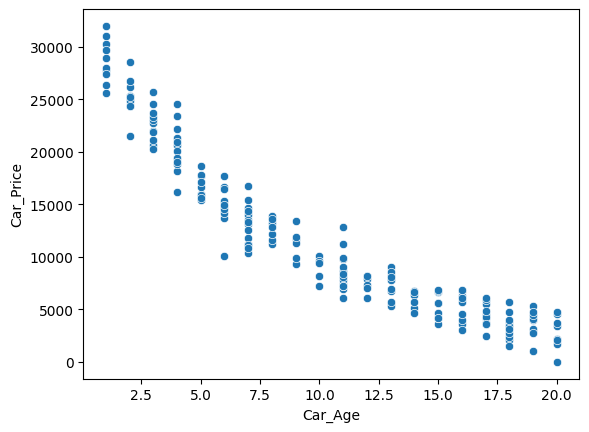

In [9]:
# visualize relationship
sns.scatterplot(data=car_df,x="Car_Age",y="Car_Price")
plt.show()

# Independent and Dependent features split

In [10]:
X=car_df[["Car_Age"]]
Y=car_df["Car_Price"]

# Train and Test split

In [11]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
X_train

,Car_Age
79,3
197,18
38,14
24,10
122,7
...,...
106,9
14,4
92,16
179,3


In [31]:
y_train

79     23041.64
197     3163.66
38      5137.08
24     10060.03
122    12512.79
         ...   
106    11869.81
14     20624.25
92      3031.81
179    20220.75
102    11828.96
Name: Car_Price, Length: 160, dtype: float64

In [32]:
X_test.shape

(40, 1)

In [33]:
y_test.shape

(40,)

# Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [34]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.20872358],
       [ 1.33595764],
       [ 0.65737598],
       [-0.02120568],
       [-0.53014192],
       [-0.53014192],
       [-1.5480144 ],
       [-0.69978733],
       [-0.53014192],
       [ 0.82702139],
       [ 0.48773057],
       [-0.86943275],
       [-1.03907816],
       [ 1.16631222],
       [-1.03907816],
       [ 1.16631222],
       [ 1.67524846],
       [-1.5480144 ],
       [ 0.14843974],
       [ 0.14843974],
       [ 0.31808515],
       [-0.19085109],
       [-1.03907816],
       [ 1.16631222],
       [ 1.16631222],
       [ 0.14843974],
       [-1.5480144 ],
       [-0.86943275],
       [-1.20872358],
       [ 0.14843974],
       [ 0.99666681],
       [ 1.33595764],
       [ 0.48773057],
       [-0.02120568],
       [ 1.33595764],
       [ 1.16631222],
       [-1.03907816],
       [ 1.67524846],
       [-1.5480144 ],
       [-1.03907816],
       [ 0.82702139],
       [-1.37836899],
       [-0.53014192],
       [ 0.31808515],
       [ 1.33595764],
       [-0

In [35]:
X_test=scaler.transform(X_test)

# Model Training

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression_model=LinearRegression(n_jobs=-1)

In [38]:
regression_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [39]:
print(f"Slope value: {regression_model.coef_}")
print(f"Intercept value: {regression_model.intercept_}")

Slope value: [-7326.76548219]
Intercept value: 11997.37175


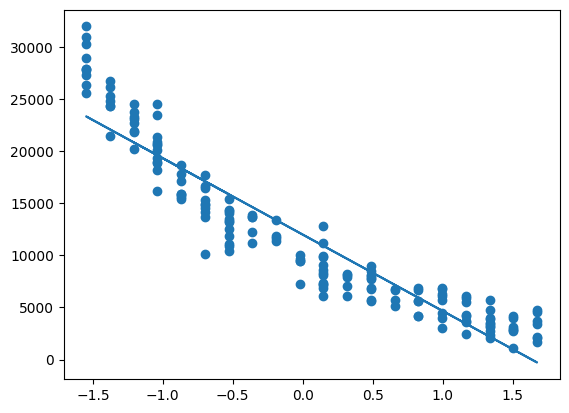

In [40]:
# best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression_model.predict(X_train))
plt.show()

# Visualization with test data

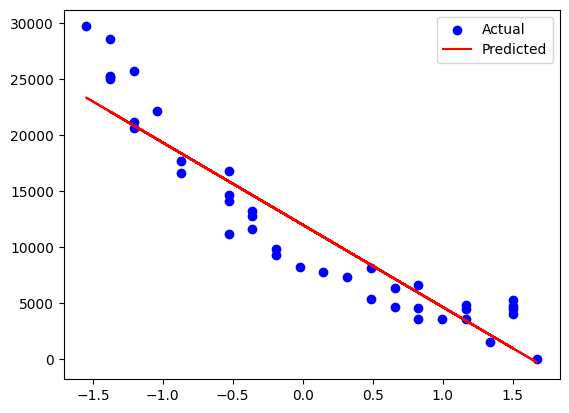

In [41]:
plt.scatter(X_test,y_test,color="blue",label="Actual")
plt.plot(X_test,regression_model.predict(X_test),color="red",label="Predicted")
plt.legend()
plt.show()

In [42]:
y_pred=regression_model.predict(X_test)

In [43]:
y_pred

array([12152.74077048, 19610.45375366,  8423.88427889, 18367.5015898 ,
       23339.31024526,  2209.12345957,  -276.78086815,  7180.93211503,
        8423.88427889,  7180.93211503, 20853.40591753,   966.17129571,
        3452.07562344, 14638.64509821,  3452.07562344, 14638.64509821,
       22096.35808139, 20853.40591753, 15881.59726207, 22096.35808139,
       18367.5015898 , 15881.59726207, 22096.35808139,  9666.83644276,
       10909.78860662, 14638.64509821, 15881.59726207,  3452.07562344,
       13395.69293435, 20853.40591753,  5937.97995116, 13395.69293435,
         966.17129571,  5937.97995116,   966.17129571,   966.17129571,
       15881.59726207,  5937.97995116, 22096.35808139,  4695.0277873 ])

# Performance metrics

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [46]:
print(f"Mean Square Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

Mean Square Error: 8243713.378833039
Mean Absolute Error: 2364.969381144888
Root Mean Square Error: 2871.186754433267


In [47]:
r2_score=r2_score(y_true=y_test,y_pred=y_pred)
print(f"R squared value: {r2_score}")

R squared value: 0.8790905594925109


# For new input

In [50]:
car_age=int(input("What is your car age?"))
predicted_price=regression_model.predict(scaler.transform([[car_age]]))
print(f"Your car price in present day may go around ${predicted_price[0]}")

Your car price in present day may go around $12152.740770482957


e:\ml-bootcamp\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
